<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Deep_Learning_Time_Series_Forecasting_using_Gluon_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##!pip install --upgrade mxnet-cu101==1.6.0.post0  ## only if you have cu101
# !pip install --upgrade mxnet==1.6.0
# !pip install gluonts

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.3
    Uninstalling urllib3-1.26.3:
      Successfully uninstalled urllib3-1.26.3
  Attempting uninstall: idna
    Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.2 requires typing-extensions<4,>=3.7.4.3, which is not installed.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.6.1 which is incompatible.
tensorboard 2.3.0 requires requests<3,>=2.21.0, but you have requests 2.18.4 which is incompatible.
pmdarima 1.8.0 requires numpy>=1.17.3, but you have numpy 1.16.6 which is incompatible.
botocore 1.20.27 requires urllib3<1.27,>=1.25.4, but you have urllib3 1.22 which is incompatible.


  Created wheel for ujson: filename=ujson-1.35-cp37-cp37m-win_amd64.whl size=35257 sha256=d6d0ebfe578c418a74fb71e4545fcd739e70e8bb8aadd9228a68ed6ccdb54a5e
  Stored in directory: c:\users\mmm559\appdata\local\pip\cache\wheels\55\e8\7e\e36b183f3e654b73fc04eb1b656ad3c2773077dd531cb35c4d
Successfully built ujson


In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [4]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [5]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


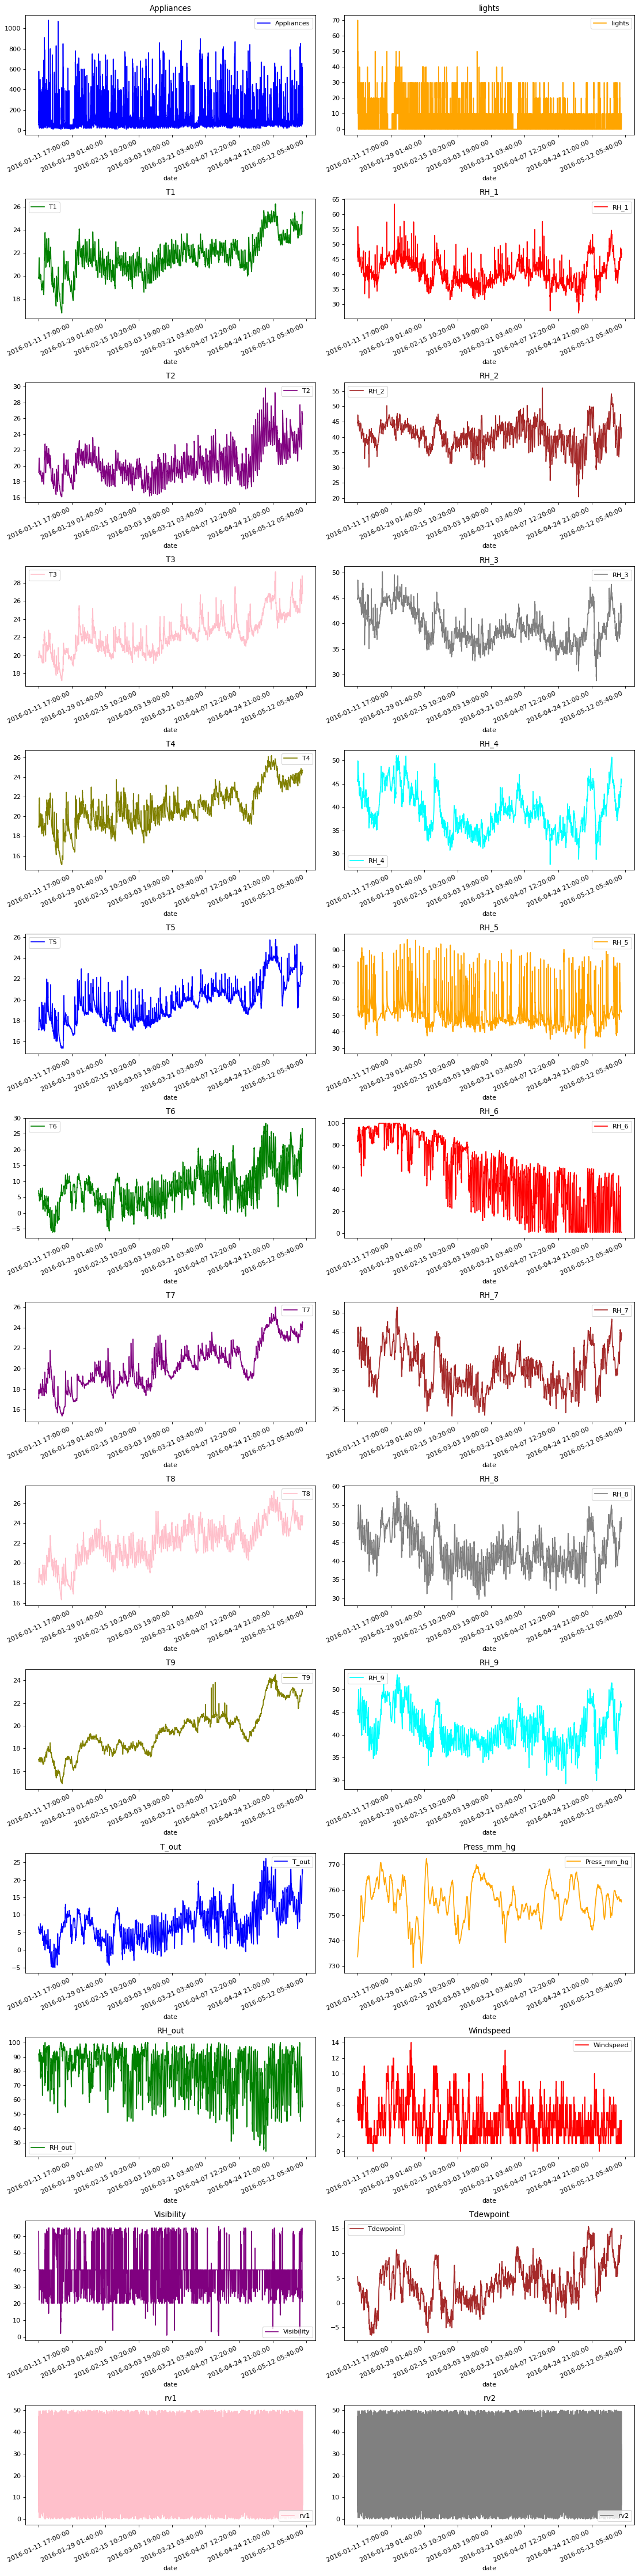

In [6]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_key = "date"


def Visualize(data):
    time_data = data[date_key]
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [7]:
df_input=df[['date','Appliances','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint', 'Visibility']]

In [8]:
df_input=df_input.set_index('date')

In [13]:
# print(pd.infer_freq(df_input))
df_input

,Appliances,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,
2016-01-11 17:00:00,60,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
2016-01-11 17:10:00,60,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2016-01-11 17:20:00,50,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
2016-01-11 17:30:00,50,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
2016-01-11 17:40:00,60,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
2016-05-27 17:30:00,90,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
2016-05-27 17:40:00,270,22.466667,755.2,56.333333,3.666667,13.266667,25.333333


In [14]:
train_time="2016-05-10 00:00:00"
prediction_length=144

In [15]:
estimator = DeepAREstimator(freq="10min", 
                            context_length=720,
                            prediction_length=prediction_length,
                            num_layers=2,
                            num_cells=128,
                            cell_type='lstm',
                            trainer=Trainer(epochs=8))

In [16]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start": df_input.index[0], "target": df_input.Appliances[:train_time]}],
    freq = "10min"
)

In [17]:
predictor = estimator.train(training_data=training_data)

Multiprocessing is not supported on Windows, num_workers will be set to None.
  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████████████████████████████████████████████| 50/50 [02:40<00:00,  3.21s/it, epoch=8/8, avg_epoch_loss=4.39]


In [18]:
test_data = ListDataset(
    [
        {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-11 00:00:00"]},
        {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-15 00:00:00"]}
    ],
    freq = "10min"
)

In [19]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [20]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  
    predictor=predictor,  
    num_samples=100,  
)

In [21]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [22]:
forecast_entry = forecasts[0]

In [23]:
forecast_entry

gluonts.model.forecast.SampleForecast(freq="10min", info=None, item_id=None, samples=numpy.array([[45.64704513549805, 38.84104919433594, 47.30335235595703, 58.0531005859375, 50.907188415527344, 51.36613464355469, 59.84814453125, 64.44522857666016, 71.45674133300781, 76.87798309326172, 83.09491729736328, 64.82907104492188, 39.50900650024414, 46.15619659423828, 53.30284118652344, 61.27482604980469, 58.10763931274414, 50.63746643066406, 55.30206298828125, 66.01274871826172, 49.21342468261719, 50.2907600402832, 49.58984375, 43.803192138671875, 48.76584243774414, 60.28102493286133, 47.935951232910156, 54.31250762939453, 40.992637634277344, 37.65263366699219, 41.222896575927734, 61.96000289916992, 52.64979553222656, 61.3268928527832, 51.06141662597656, 61.41587829589844, 57.07304763793945, 74.64311981201172, 50.53738021850586, 49.032012939453125, 46.124290466308594, 55.799827575683594, 44.29852294921875, 61.940860748291016, 48.46860122680664, 54.35066604614258, 54.380401611328125, 46.0127029

In [24]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_length
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax) 
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

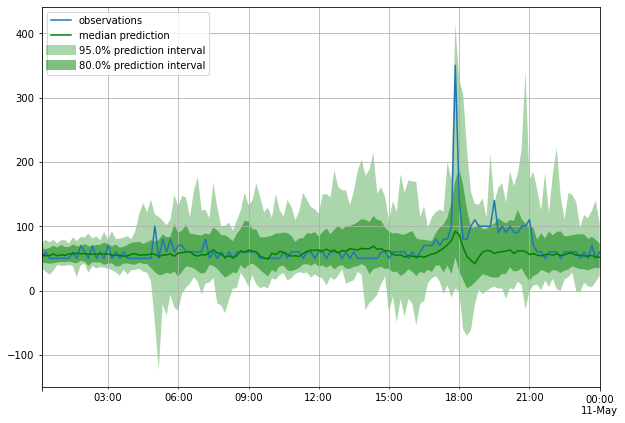

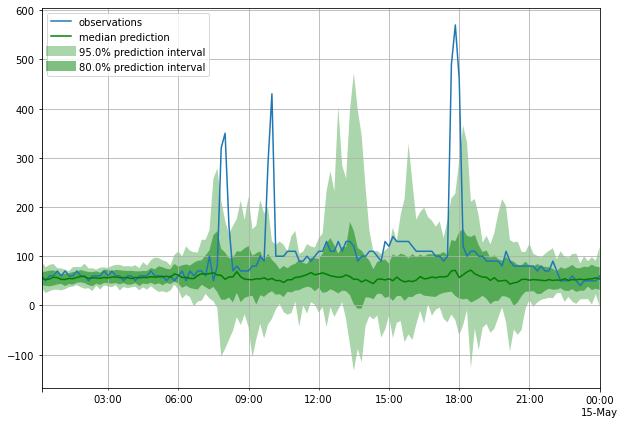

In [25]:
plot_prob_forecasts(tss[0], forecasts[0])
plot_prob_forecasts(tss[1], forecasts[1])


In [26]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 107.93it/s]


In [27]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,711.196452,1959.176514,9510.0,66.041667,29.977297,0.453857,0.163291,0.181658,NaN,4.423238,951.571096,0.0,1959.176483,0.458333,1253.019994,0.930556
1,NaN,7668.822917,6516.318359,14350.0,99.652778,29.797792,1.518643,0.326180,0.432083,NaN,19.250052,2078.087543,0.0,6516.318165,0.131944,5333.004816,0.666667
